# Project Predicting the Satisfaction Level of Santander Bank Customers

   Neste projeto foi desenvolvido um modelo preditivo para identificar clientes insatisfeitos no começo do relacionamento
com o banco Santander. 
   Essa predição foi baseado em imformações históricas, coletadas de antigos e atuais clientes, possibilitando a 
previsão de satisfação de novos clientes.


In this project, was developed a predictive model to identify unhappy customers at the beginning of the relationship with Santander Bank. 
It was based on historical information collected from the past and current customers, making it possible to predict the satisfaction of new customers.

In [1]:
# Packages used to load and clear data
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sklearn
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing the training file with the target variable
x_train = pd.read_csv("C:/FCD/Projetos_github/Santander_Customer_Satisfaction/Projeto/data_santander/train.csv")

In [3]:
# A var15 pode ser a idade de cada cliente
x_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
# Importing the test file  
x_test = pd.read_csv("C:/FCD/Projetos_github/Santander_Customer_Satisfaction/Projeto/data_santander/test.csv")

In [5]:
# Loanding the TARGET file
submission = pd.read_csv("C:/FCD/Projetos_github/Santander_Customer_Satisfaction/Projeto/data_santander/sample_submission.csv")

## Analise Exploratória

In [6]:
x_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


Algumas considerações referêntes às observações acima nas colunas:
- var3: Nessa coluna existe um valor desconhecido -999999.000000 que devemos imputar
- var15: existe valoresde 5 até 105, esta variável pode representar a idade
- var38: seus valores estão dentro de um intervalo de  5163.75000 até 22034740.000, por isso pode representar valores financeiros. 

In [7]:
# Imputação do valor -999999 pela moda que é 2
x_train.var3 = x_train.var3.replace(-999999,2)
x_test.var3 = x_test.var3.replace(-999999,2)

In [8]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [9]:
# De todas variáveis, existem 259 do tipo int64 e 111 do tipo float64
x_train.dtypes.value_counts()

int64      260
float64    111
dtype: int64

96.0431465403841 %
3.9568534596158904 %


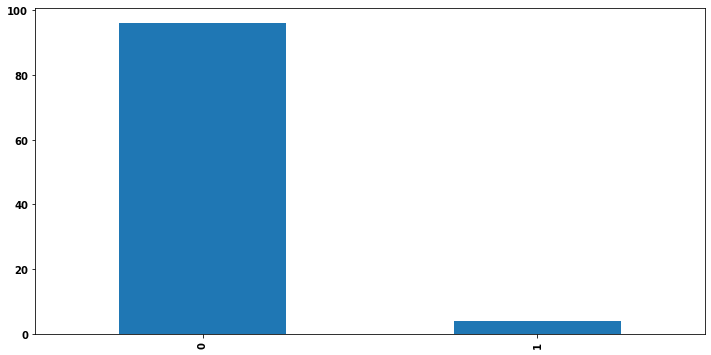

In [10]:
# A variável targe está desbalanceada
target = x_train.TARGET.value_counts()/len(x_train)*100
target.plot(kind='bar', figsize=(12,6))
print(target[0],"%")
print(target[1],"%")

In [11]:
# Não há valores Nan
x_train.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

<AxesSubplot:>

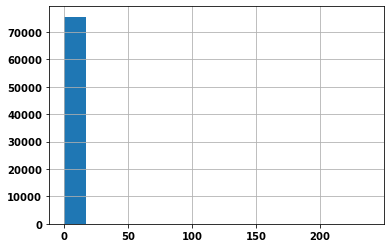

In [12]:
x_train.var3.hist(bins=14)

In [13]:
x_train.var3.describe()

count    76020.000000
mean         2.716483
std          9.447971
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        238.000000
Name: var3, dtype: float64

####  Na coluna var3 a maioria dos clientes tem o mesmo valor (75%) o que representa uma caracteristica comum entre eles, que pode ser o sexo ou o paíz

In [14]:
x_train.var15.describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

#### Supondo que a variável var15 é a idade do cliente, podemos observar que no histograma Zero(0) que representa os clientes satisfeitos, há uma frequência relevante na idade próxima ou igual a 25 anos.

#### Já no histograma Um(1), observa-se uma frequência relevante nos intervalos de 25 até 55.

#### A maioria dos clientes estão entre 25 e 35 anos.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

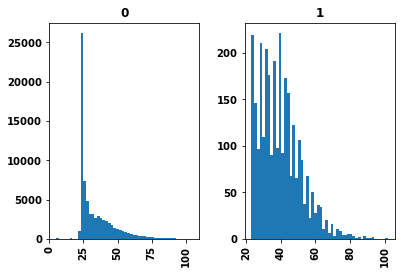

In [15]:
x_train.var15.hist(by=x_train.TARGET, bins=50)

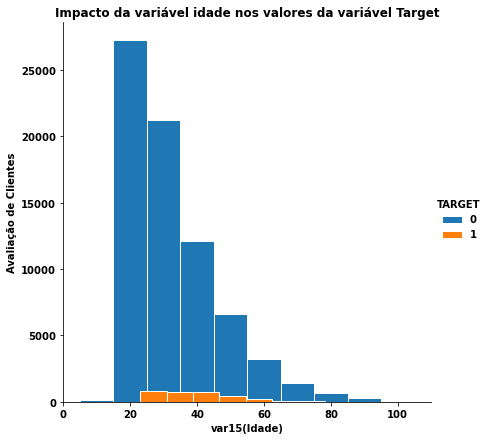

In [16]:
sns.FacetGrid(x_train, hue="TARGET", size=6) \
   .map(plt.hist, "var15",edgecolor='w', bins=10) \
   .add_legend()
plt.xlabel("var15(Idade)")
plt.ylabel("Avaliação de Clientes")
plt.title('Impacto da variável idade nos valores da variável Target')
plt.show()

<AxesSubplot:title={'center':'var15'}, xlabel='TARGET'>

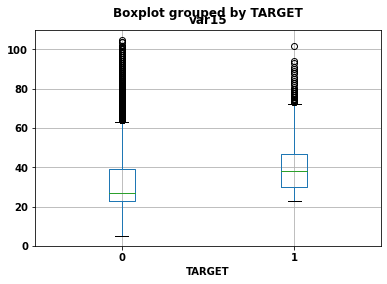

In [17]:
# Através do gráfico bosxplot mostra claramente a existencia de outiliers com valores grandes
x_train.boxplot(column='var15', by='TARGET')

In [18]:
# Analisando o describe da coluna var38, que supoe ser valores finaceiros
x_train.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

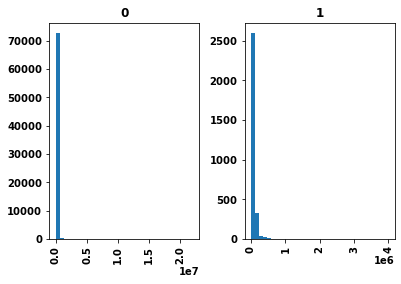

In [19]:
x_train.var38.hist(by=x_train.TARGET, bins=35)

### Analisando valores estatisticos de cada variável sob uma transposta do describe() e ordenando os valores pelo desvio padrão crescente, percebe-se que há muitas colunas com valores somente de zeros

In [20]:
print(x_train.describe().T.query('std==0').head(),"\n",len(x_train.describe().T.query('std==0')))

               count  mean  std  min  25%  50%  75%  max
ind_var2_0   76020.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
ind_var2     76020.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
ind_var27_0  76020.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
ind_var28_0  76020.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
ind_var28    76020.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 34


In [21]:
del_col = x_train.describe().T.sort_values(by='std')
del_col = del_col.query('std==0')

In [22]:
del_col.index

Index(['ind_var27_0', 'imp_amort_var34_hace3', 'saldo_var46',
       'num_trasp_var17_out_hace3', 'ind_var2_0', 'ind_var2', 'saldo_var28',
       'num_var46', 'saldo_var27', 'imp_amort_var18_hace3', 'ind_var41',
       'num_reemb_var33_hace3', 'ind_var46_0', 'saldo_var41',
       'num_reemb_var13_hace3', 'ind_var28_0', 'num_var46_0',
       'num_trasp_var33_out_hace3', 'num_var27_0', 'ind_var28', 'ind_var27',
       'num_var41', 'imp_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'num_var2_0_ult1', 'imp_trasp_var17_out_hace3', 'num_var27',
       'imp_reemb_var33_hace3', 'num_var28', 'num_var28_0',
       'imp_reemb_var13_hace3', 'saldo_medio_var13_medio_hace3',
       'num_var2_ult1', 'ind_var46'],
      dtype='object')

In [23]:
x_train.shape, x_test.shape

((76020, 371), (75818, 370))

### Vamos selecionar essas colunas com valores zeros e deletá-las

In [24]:
x_train.drop(del_col.index, axis=1, inplace=True)
x_test.drop(del_col.index, axis=1, inplace=True)

In [25]:
x_train.shape, x_test.shape

((76020, 337), (75818, 336))

In [26]:
# Agora temos 197 inteiros e 110 flutuantes
x_train.dtypes.value_counts()

int64      226
float64    111
dtype: int64

### listando as colunas onde a maioria dos valores são igual (99.9%), e imprimindo as colunas selecionadas

In [27]:
features = []
for f in x_train.columns:
    aprox = (x_train[f].value_counts()/np.float(len(x_train))).sort_values(ascending=False).values[0]
    if aprox > 0.999:
        features.append(f)
x_train[features]    

,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,ind_var6_0,ind_var6,ind_var13_medio_0,ind_var13_medio,ind_var18_0,ind_var18,ind_var29_0,ind_var29,...,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace3
0,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76016,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76017,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76018,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Fazendo uma cópia e deletando as colunas de valores constantes

In [28]:
x_train_vc = x_train.drop(columns= features, axis=1)
x_test_vc = x_test.drop(columns= features, axis=1)

In [29]:
x_train_vc.shape, x_test_vc.shape

((76020, 225), (75818, 224))

### listando as colunas duplicadas e excluido-as, pois duas colunas com praticamente a mesma informação atrapalhará o modelo 

In [30]:
col_duplicates = []
columns = x_train.columns
for i in range(len(columns)-1):
    s = x_train[columns[i]].values
    for j in range(i+1, len(columns)):
        if np.array_equal(s, x_train[columns[j]].values):
            col_duplicates.append(columns[j])

x_train[col_duplicates]

,ind_var29_0,ind_var29,ind_var13_medio,ind_var18,ind_var26,ind_var25,ind_var32,ind_var34,ind_var37,ind_var39,...,num_var39,saldo_var29,saldo_medio_var13_medio_ult1,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3
0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0.0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
76016,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
76017,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
76018,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0


In [31]:
x_train.drop(col_duplicates, axis=1, inplace=True)
x_test.drop(col_duplicates, axis=1, inplace=True)

# checado shape
x_train.shape, x_test.shape

((76020, 308), (75818, 307))

In [32]:
# Deletabdo as colunas duplicadas 
for i in col_duplicates:
    if i in x_train_vc and i in x_test_vc:
        x_train_vc.drop(labels=i, axis=1, inplace=True)
        x_test_vc.drop(labels=i, axis=1, inplace=True)

## Analise de Variância

In [33]:
from sklearn.feature_selection import VarianceThreshold

#### Função para selecionar colunas com variância menores que 0.02, pois essas colunas tem pouco impacto nos dados

VAR = mean(abs(x - x.mean())**2)

In [34]:
def colunas_baixa_var(data):
    threshold=0.98
    sel = VarianceThreshold(threshold=(threshold* (1 - threshold) ))
    sel_var=sel.fit_transform(data)
    return data.columns[sel.get_support(indices=True)]

In [35]:
(x_train.var() < 0.02).value_counts()

False    249
True      59
dtype: int64

#### Removendo features com variância menor que 0.02 em um novo dataset

In [36]:
x_train_hv = x_train[colunas_baixa_var(x_train)].copy()
x_test_hv = x_test[colunas_baixa_var(x_train)[:-1]].copy()

In [37]:
# shape dataset após remoção das colunas com baixa variância
x_train_hv.shape, x_test_hv.shape

((76020, 249), (75818, 248))

In [38]:
len(x_test_vc.columns), len(x_train_vc.columns), len(x_test_vc[colunas_baixa_var(x_test_vc)].columns)\
, len(x_train_vc[colunas_baixa_var(x_train_vc)].columns)

(214, 215, 189, 190)

In [39]:
x_train_vc_hv = x_train_vc[colunas_baixa_var(x_train_vc)].copy()
x_test_vc_hv = x_test_vc[colunas_baixa_var(x_test_vc)].copy()

In [40]:
x_train_vc_hv.shape, x_test_vc_hv.shape

((76020, 190), (75818, 189))

### Analise de Correlação

#### Função para listar nomes de colunas com correlação maior do que 0.95

In [41]:
def achar_corr_colunas(data):
    
    # criar uma matriz de correlação com valores absolutos 
    corr_matrix = data.corr().abs()
    
    # Selecione o triângulo superior da matrix de correlação definido por k=1
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
    
    # Encontrar variáveis com correlação maior do que 0.95
    to_drop=[colum for colum in upper.columns if any(upper[colum] > 0.95)]
    
    print(len(to_drop))
    return to_drop

In [42]:
x_train_hv_co = x_train_hv.drop(achar_corr_colunas(x_train_hv), axis=1)
x_test_hv_co = x_test_hv.drop(achar_corr_colunas(x_train_hv), axis=1)

70
70


In [43]:
x_train_hv_co.shape, x_test_hv_co.shape

((76020, 179), (75818, 178))

In [44]:
x_train_vc_hv_co = x_train_vc_hv.drop(achar_corr_colunas(x_train_vc_hv), axis=1)
x_test_vc_hv_co = x_test_vc_hv.drop(achar_corr_colunas(x_train_vc_hv), axis=1)

55
55


In [45]:
x_train_vc_hv_co.shape, x_test_vc_hv_co.shape

((76020, 135), (75818, 134))

<Figure size 864x576 with 0 Axes>

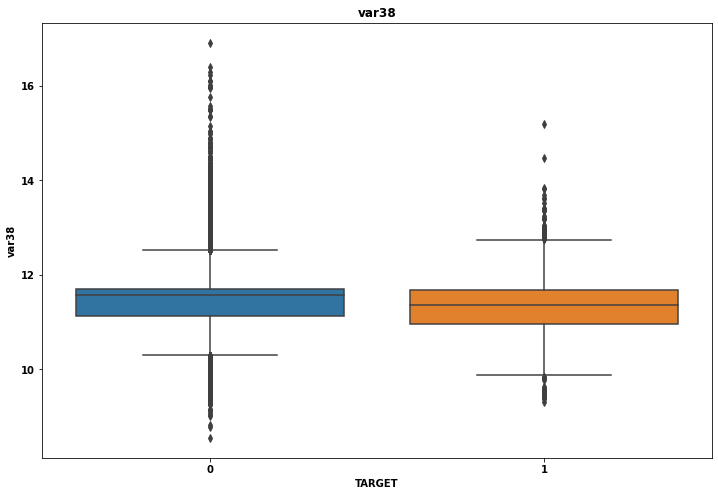

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

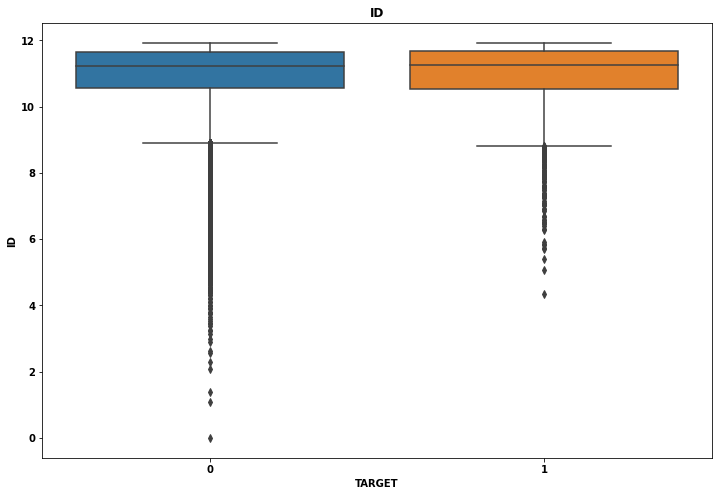

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [46]:
for i in x_train_vc_hv_co.var().sort_values(ascending=False).index[1:10]:
    plt.figure(figsize=(12,8))
    data = x_train.copy() 
    if 0 in data[i].unique():
        pass
    else:    
        data[i]=np.log(data[i])
        sns.boxplot(y=i, x= "TARGET", data= data)
        plt.ylabel(i)
        plt.title(i)
        plt.yticks()
        plt.show()
        

In [47]:
q1 = x_train_vc_hv_co.quantile(0.25)

In [48]:
q3 = x_train_vc_hv_co.quantile(0.75)

In [49]:
iqr = q3-q1

In [50]:
iqr

ID                              75644.00
var3                                0.00
var15                              17.00
imp_ent_var16_ult1                  0.00
imp_op_var39_comer_ult1             0.00
                                  ...   
saldo_medio_var13_largo_ult1        0.00
saldo_medio_var44_hace2             0.00
saldo_medio_var44_ult1              0.00
var38                           50885.64
TARGET                              0.00
Length: 135, dtype: float64

In [ ]:
print(train_data_ac_hv_co < (Q1 - 1.5 * IQR)) or (train_data_ac_hv_co > (Q3 + 1.5 * IQR))

In [54]:
# achando outliers no dataset
print(x_train_vc_hv_co < (q1 - 1.5*iqr)) or (x_train_vc_hv_co > (q3 + 1.5*iqr))

          ID   var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0      False  False  False               False                    False   
1      False  False  False               False                    False   
2      False  False  False               False                    False   
3      False  False  False               False                    False   
4      False  False  False               False                    False   
...      ...    ...    ...                 ...                      ...   
76015  False  False  False               False                    False   
76016  False  False  False               False                    False   
76017  False  False  False               False                    False   
76018  False  False  False               False                    False   
76019  False  False  False               False                    False   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
0                        False          

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_ult1,imp_op_var41_efect_ult1,...,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var44_hace2,saldo_medio_var44_ult1,var38,TARGET
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

train_data_ol=train_data_ac_hv_co.copy()
train_data_out = train_data_ol[((train_data_ol >= (Q1 - 1.5 * IQR)) & (train_data_ol <= (Q3 + 1.5 * IQR))).all(axis=1)]

In [55]:
# Removendo outliers

x_train_ag = x_train_vc_hv_co.copy()
x_train_sair = x_train_ag[((x_train_ag >= (q1 - 1.5*iqr)) & (x_train_ag <= (q3 + 1.5*iqr))).all(axis=1)]

In [56]:
x_train_sair

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_ult1,imp_op_var41_efect_ult1,...,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var44_hace2,saldo_medio_var44_ult1,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
8,20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76010,151816,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165616.320000,0
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [57]:
x_train_sair.TARGET.value_counts()

0    27154
Name: TARGET, dtype: int64

In [58]:
# Remover as colunas target e ID para dimencionar os dados entre -1 e 1

x_train_scaled2 = x_train_hv_co.drop(["ID","TARGET"], axis=1)
x_train_scaled1 = x_train_vc_hv_co.drop(["ID","TARGET"], axis=1)
x_train_scaled =x_train.drop(["ID","TARGET"], axis=1)

In [61]:
print(x_train_scaled.shape, x_train_scaled1.shape, x_train_scaled2.shape)

(76020, 306) (76020, 133) (76020, 177)


In [65]:
from sklearn.decomposition import PCA
def find_pca_components(data):
    pca = PCA().fit(data)
    plt.rcParams["figure.figsize"] = (12,6)

    fig, ax = plt.subplots()
    xi = np.arange(1, data.shape[1]+1, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi/2, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Número de Componentes')
    plt.xticks(np.arange(0, data.shape[1]/2, step=2)) #change from 0-based array index to 1-based human-readable label
    plt.ylabel('Variância cumulativa (%)')
    plt.title('O número de componentes necessários para explicar a variação')
    plt.axhline(y=0.98, color='r', linestyle='-')
    plt.text(0.7, 0.85, 'Limite de corte de 98%', color = 'red', fontsize=16)
    print("Previsão do componente Pca:")
    ax.grid(axis='x')
    plt.show()

Previsão do componente Pca:


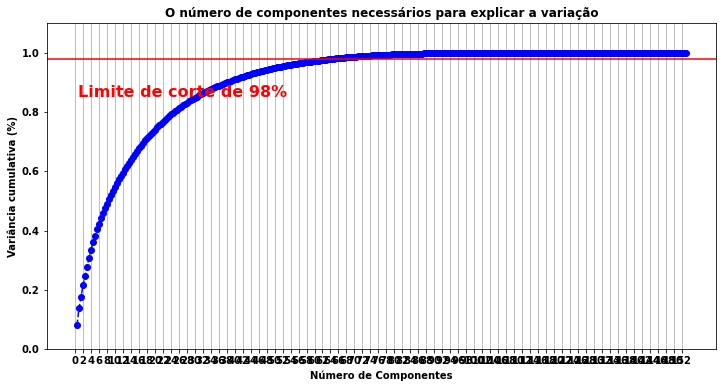

Previsão do componente Pca:


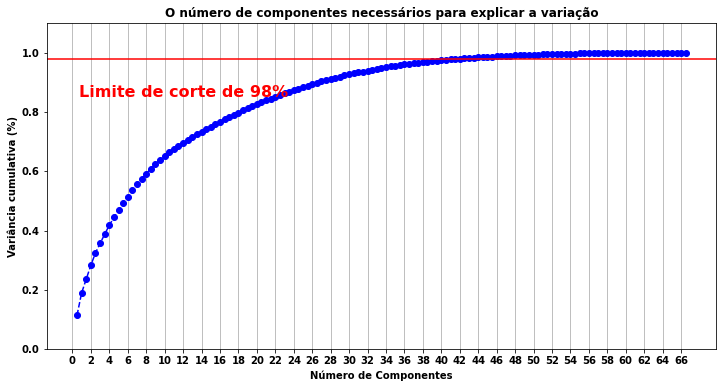

Previsão do componente Pca:


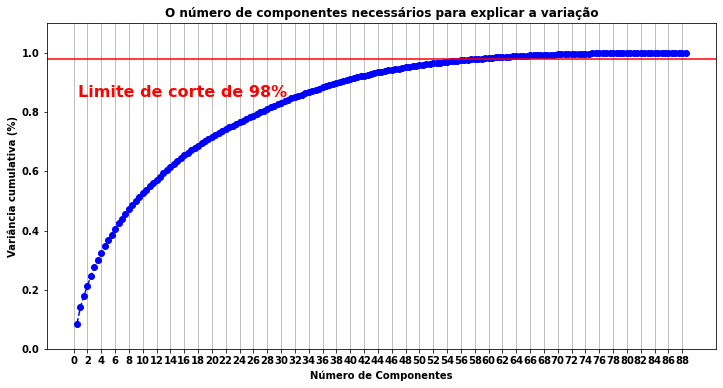

In [66]:
from sklearn.preprocessing import StandardScaler
for data in [x_train_scaled, x_train_scaled1, x_train_scaled2]:
    scaler = StandardScaler()
    find_pca_components(scaler.fit_transform(data))

### Análise PCA

In [ ]:
# Removendo as colunas de destino e ID para dimensionar os dados em todas as colunas entre -1 e 1

x_train_scaled2= x_train_hv_co.drop(["ID","TARGET"],axis=1)
x_train_scaled1= x_train_hv.drop(["ID","TARGET"],axis=1)
x_train_scaled= x_train.drop(["ID","TARGET"],axis=1)

In [ ]:
x_train_scaled2.shape, x_train_scaled1.shape, x_train_scaled.shape

In [ ]:
plt.figure(figsize=(12,8))
 
sns.boxplot(y = 'var38', x = 'TARGET', data=x_train_hv_co)
plt.show()

In [ ]:
for f in x_train[x_train_hv_co].var().sort_values(ascending=False).index[0:3]:
    plt.figure(figsize=(12,6))
    if 0 in x_train[f].unique():
        pass
    else:
        x_train[f] = np.log(x_train[f])
        sns.boxplot(y = f, x = 'TARGET', data=x_train)
        plt.ylabel(f)
        plt.title(f)
        plt.yticks()
        plt.show()

In [ ]:
for feature in x_train[x_train_hv_co.var().sort_values(ascending=False).index[0:10]]:
    plt.figure(figsize = (12, 8))
    data = x_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        sns.boxplot(y = feature, x = 'TARGET', data = data)
        plt.ylabel(feature)
        plt.title(feature)
        plt.yticks()
        plt.show()

In [ ]:
x_train.var3.dtype

In [ ]:
vrs = x_train.var3.astype(int).value_counts()
vr = vrs/len(x_train)
vr

In [ ]:
# x_train.var15.value_counts()[:10]/len(x_train)

vr = x_train.var3.value_counts()
vr[:3]

In [ ]:
# gauardando a variável target
y_train = x_train.TARGET.to_frame()

In [ ]:
# Del column ID
x_train.drop(['ID','TARGET'], axis=1, inplace=True)
x_test.drop(['ID'], axis=1, inplace=True)
y_test.drop(['ID'], axis=1, inplace=True)

In [ ]:
# Checking the shape of the data
x_train.shape, x_test.shape, y_test.shape, y_train.shape

In [ ]:
val=x_train.var3.value_counts()/len(x_train)
val = val[:5]
list(val.axes)

In [ ]:
# top 5 values more communs
# Note that the negative value -999999 is incompatible to enter the predictive model algorithm
x_train.var3.value_counts()[:5], x_test.var3.value_counts()[:5]

In [ ]:
# 116 values of -999999 were found in column var3 which is suspected to be the client's nationality and
# the value -999999 is can be said to be the nationality unknown to the client or has not been placed


x_train.loc[x_train.var3==-999999].shape, x_test.loc[x_test.var3==-999999].shape, X_dados.loc[X_dados.var3==-999999].shape 

In [ ]:
# So we are going to replace the value -999999 by the value 2 fashion, which is the most repeated value  

x_train.var3 = x_train.var3.replace(-999999,2)
x_test.var3 = x_test.var3.replace(-999999,2)
X_dados.var3 = X_dados.var3.replace(-999999,2)

x_train.loc[x_train.var3==999999].shape, x_test.loc[x_test.var3==999999].shape, X_dados.loc[X_dados.var3==999999].shape

In [ ]:
# Gathering training data x and y
xy_train = x_train.copy()
xy_train['TARGET'] = y_train['TARGET']
xy_train.shape, type(xy_train)

In [ ]:
# Checking shape
x_train.shape, x_test.shape, y_test.shape, y_train.shape, X_dados.shape, Y_dados.shape, xy_train.shape

In [ ]:
# Data Normalization:
x_train_normalizados = x_train.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
x_test_normalizados = x_test.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
X_dados_normalizados = X_dados.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
xy_train_normalizados = xy_train.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

In [ ]:
# Calculating the standard deviation of each column and removing columns with a standard deviation less than or equal to 0.07
# then 52 columns remain.
# Based on the standard deviation of the VAR3 variable, 
# any variable that has a standard deviation less than 0.041125 will be excluded.

XNR = X_dados_normalizados.copy()
cols_Remove = []

for col in XNR.columns:
    if XNR[col].std() < 0.07:
        cols_Remove.append(col)
        
XNR.drop(cols_Remove, axis=1, inplace=True)

Col_Excluidas = len(X_dados_normalizados.columns) - len(XNR.columns)

msg = '%s columns were excluded  \nand %s colunms left' % (len(cols_Remove), len(XNR.columns))

print(msg)

In [ ]:
# x_train.drop(cols_Remove, axis=1, inplace=True)
# x_test.drop(cols_Remove, axis=1, inplace=True)
# X_dados.drop(cols_Remove, axis=1, inplace=True)

# x_train.shape, x_test.shape, X_dados.shape

In [ ]:
# Happy customers have TARGET==0, unhappy custormers have TARGET==1.
# The most customers are classified satisfied customers, almost 4% are just dissatisfied customers.
# The TARGET variable is not balanced.
df = pd.DataFrame(xy_train.TARGET.value_counts())
df['Porcentagem'] = 100*df['TARGET']/xy_train.shape[0]
df

# BALANCING THE TARGET VARIABLE CLASSES AND SELECTING THE PREDICTIVE MODEL

In [ ]:
%%time

# The CART algorithm showed the best precision among the others
array = XNR
labels = array.columns

X = array[labels]
y = Y_dados
    
X_resampled, y_resampled = SMOTE(sampling_strategy=0.2).fit_resample(X, y)   

X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=1)

model = DecisionTreeClassifier()
modelo = model.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
msg = " Accuracy: %.2f%%" % ((accuracy * 100.0))    


print(msg)
# Making predictions and building the report
report = classification_report(y_test, y_pred)

# Printing the report
print(report)

# Confusion Matrix 
Metric used to check the target balancing of target classes

In [ ]:
%%time
# Confusion Matrix
# Now let's check the accuracy in a table format with DecisionTreeClassifier (CART)

# loading and share data in predictive variables and the target variable
array = XNR
labels = array.columns

X = array[labels]
y = Y_dados


# Splitting data into training and testing
model = SMOTE()
X_resampled, y_resampled = model.fit_resample(X, y)   

X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Creating a model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Making predictions and building the Confusion Matrix
previsoes = model.predict(X_test)
matrix = confusion_matrix(y_test, previsoes)

# Printing Confusion Matrix
print(matrix)
print(previsoes)
print(model.feature_importances_)

# Classification Report for CART

In [ ]:
%%time

# Loading datas

array = XNR
labels = array.columns

X = array[labels]
y = Y_dados
    
# Separating training data and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

# Division of training data into training data and validation data
x_train_res, x_val, y_train_res, y_val = train_test_split(X_train, y_train,
                                                  test_size = .1,
                                                  random_state=12)

# Applying SMOTE for class balancing
modeloSMOTE = SMOTE(sampling_strategy='all', k_neighbors=5)
X_resampled, y_resampled = modeloSMOTE.fit_sample(x_train_res, y_train_res)
        
# Creating the model
model = DecisionTreeClassifier()
modelo = model.fit(X_resampled, y_resampled)
y_pred = modelo.predict(X_test)
          
# Evaluating the model and updating the accuracy list
score = model.score(x_val, y_val)
print("Accuracy is = %.2f%%" % ( score * 100))

# Making predictions and building the report
report = classification_report(y_test, y_pred)

# Printing the report
print(report)